# データセット取得（Default of Credit Card Clients Dataset）
Default of Credit Card Clients Dataset：2005年4月から2005年9月までの台湾のクレジットカードクライアントのデータセット。

以下のようなデータが含まれます。

このサンプルではdefault(債務不履行)の有無を判定するモデルを作成。
* ID：各クライアントのID
* LIMIT_BAL：ニュー台湾ドルのクレジット金額 ※個人および家族/補足クレジットを含む
* SEX：性別（1:男性、2:女性）
* EDUCATION：教育状況（1:大学院、2:大学、3:高校、4:その他、5:不明、6:不明）
* MARRIAGE：婚姻状況（1:既婚、2:単身、3:その他）
* AGE：年数
* PAY_1～PAY_6：nか月前までの返済ステータス ※PAY_1:先月 ～ PAY_6:6か月前<br>（-1:通常の支払い、1:1か月の支払い遅延 ～ 8:8か月の支払い遅延、9:9か月以上の支払い遅延）
* BILL_AMT1～BILL_AMT6：nか月前の請求明細書の金額 ※BILL_AMT1:先月 ～ BILL_AMT6:6か月前
* PAY_AMT1～PAY_AMT6 nか月前までの支払い額 ※BILL_AMT1:先月 ～ BILL_AMT6:6か月前
* default：債務不履行（1:はい、0:いいえ)

In [1]:
# PyCaretチュートリアル用データセット取得
# 詳細は<https://pycaret.org/get-data/>を参照
from pycaret.datasets import get_data

dataset = get_data('credit')
dataset.to_csv('./dataset.csv')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  24000 non-null  int64  
 1   SEX        24000 non-null  int64  
 2   EDUCATION  24000 non-null  int64  
 3   MARRIAGE   24000 non-null  int64  
 4   AGE        24000 non-null  int64  
 5   PAY_1      24000 non-null  int64  
 6   PAY_2      24000 non-null  int64  
 7   PAY_3      24000 non-null  int64  
 8   PAY_4      24000 non-null  int64  
 9   PAY_5      24000 non-null  int64  
 10  PAY_6      24000 non-null  int64  
 11  BILL_AMT1  24000 non-null  float64
 12  BILL_AMT2  24000 non-null  float64
 13  BILL_AMT3  24000 non-null  float64
 14  BILL_AMT4  24000 non-null  float64
 15  BILL_AMT5  24000 non-null  float64
 16  BILL_AMT6  24000 non-null  float64
 17  PAY_AMT1   24000 non-null  float64
 18  PAY_AMT2   24000 non-null  float64
 19  PAY_AMT3   24000 non-null  float64
 20  PAY_AM

In [3]:
# 学習データ/テストデータ分割
train_data = dataset.sample(frac=0.95, random_state=42).reset_index(drop=True)
test_data = dataset.drop(train_data.index).reset_index(drop=True)

print('データ      ：' + str(dataset.shape) + ' ' + str(dataset.index))
print('学習データ  ：' + str(train_data.shape) + ' ' + str(train_data.index))
print('テストデータ：' + str(test_data.shape) + ' ' + str(test_data.index))

データ      ：(24000, 24) RangeIndex(start=0, stop=24000, step=1)
学習データ  ：(22800, 24) RangeIndex(start=0, stop=22800, step=1)
テストデータ：(1200, 24) RangeIndex(start=0, stop=1200, step=1)


# PyCaretでのデータセットアップ

In [4]:
# クラス分類用インポート
from pycaret.classification import *

In [5]:
# 目的変数を'default'に指定しデータのセットアップを実施
# session_idを指定することで欄数シードを固定
# セットアップが完了するとデータの情報や前処理のパイプラインの情報が表示される
# 詳細は<https://pycaret.org/setup/>を参照
# 
# また、欠損値の補間等の前処理もsetup()実施時に可能
# 前処理の詳細は<https://pycaret.org/preprocessing/>を参照
exp = setup(data=train_data, target='default', session_id=42) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(22800, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [6]:
print(exp)

(       LIMIT_BAL   AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0       180000.0  24.0    64800.0    66747.0    67227.0    68398.0    70409.0   
1       180000.0  32.0     3305.0     1649.0     1473.0     1473.0     2705.0   
2        60000.0  23.0    56397.0    57112.0    58057.0    59006.0    39578.0   
3       160000.0  32.0     5525.0     4039.0     3656.0     3801.0     2540.0   
4       650000.0  29.0    21289.0      518.0      216.0     2482.0     5178.0   
...          ...   ...        ...        ...        ...        ...        ...   
22795    20000.0  32.0    18390.0    19468.0    20844.0    19362.0    19402.0   
22796    10000.0  30.0     9211.0     8119.0     7604.0     7637.0     6056.0   
22797   230000.0  44.0    54798.0    11632.0     4987.0     6222.0    15121.0   
22798   100000.0  23.0    13530.0    14564.0    15561.0    18306.0    20594.0   
22799    50000.0  32.0    50564.0    49710.0        0.0    50551.0    40590.0   

       BILL_AMT6  PAY_AMT1

# モデル比較

In [7]:
# Pycaretのサポートする全てのモデルを実行しパフォーマンスを比較する
# デフォルトではAccuracyでソートされるが、引数を指定することで変更可能 例：compare_models(sort='Recall')
# 交差検証数のデフォルトは10だが、引数を指定することで変更可能 例：compare_models(fold = 5)で5分割交差検証
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.821000,0.000000,0.357000,0.684800,0.469100,0.374100
1,Gradient Boosting Classifier,0.820800,0.781300,0.356400,0.683500,0.468300,0.373200
2,Linear Discriminant Analysis,0.820500,0.765900,0.373400,0.670800,0.479500,0.381600
3,Extreme Gradient Boosting,0.820500,0.780900,0.349600,0.686100,0.463000,0.368700
4,Light Gradient Boosting Machine,0.819300,0.774800,0.366000,0.668900,0.473000,0.375100
5,CatBoost Classifier,0.819000,0.776100,0.367700,0.666100,0.473600,0.375200
6,Ada Boost Classifier,0.816200,0.770900,0.329600,0.675200,0.442700,0.348000
7,Random Forest Classifier,0.805300,0.723100,0.316000,0.619600,0.418400,0.316000
8,Extra Trees Classifier,0.804200,0.738400,0.365500,0.595100,0.452400,0.341500
9,Logistic Regression,0.778400,0.652400,0.000300,0.100000,0.000600,0.000400


# モデル生成
以降では、例として決定木での生成を実施する

※ハイパーパラメータチューニングの効果を実感しやすいため

In [8]:
# 引数で作成するモデルを指定
# 指定可能はモデルの詳細は<https://pycaret.org/create-model/>を参照
dt_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7024,0.5794,0.3559,0.3378,0.3466,0.1541
1,0.7137,0.6057,0.4124,0.3696,0.3899,0.2035
2,0.7243,0.6045,0.3898,0.3812,0.3855,0.2078
3,0.7274,0.6269,0.4463,0.3980,0.4208,0.2433
4,0.7212,0.6209,0.4407,0.3871,0.4122,0.2304
5,0.7224,0.6177,0.4294,0.3868,0.4070,0.2264
6,0.7093,0.5971,0.3955,0.3590,0.3763,0.1874
7,0.7299,0.6104,0.3955,0.3922,0.3938,0.2201
8,0.7337,0.6260,0.4334,0.4048,0.4186,0.2462
9,0.7254,0.6128,0.4108,0.3867,0.3984,0.2207


In [9]:
print(dt_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


# モデルチューニング
create_model()では、デフォルトのハイパーパラメーターでモデルを生成する。

tune_model()では、事前に定義されたハイパーパラメーターを自動的に調整し交差検証を実施する。

In [10]:
# tune_model()は、事前定義された検索スペースでのハイパーパラメーターをランダムグリッド検索する。
# デフォルトでは、Accuracyを最適化するように設定されているが、引数を指定することで変更可能。
# 例：tune_model('dt', optimize = 'AUC')
tuned_dt_model = tune_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8089,0.7057,0.2288,0.7168,0.3469,0.2684
1,0.8083,0.7460,0.2514,0.6846,0.3678,0.2822
2,0.8183,0.7058,0.3475,0.6758,0.4590,0.3630
3,0.8070,0.7362,0.2571,0.6691,0.3714,0.2832
4,0.8189,0.7545,0.3164,0.7044,0.4366,0.3468
5,0.8227,0.7340,0.2853,0.7710,0.4165,0.3371
6,0.7982,0.6934,0.3446,0.5755,0.4311,0.3177
7,0.8127,0.7342,0.2599,0.7132,0.3810,0.2978
8,0.8070,0.7081,0.2521,0.6692,0.3663,0.2790
9,0.8150,0.7173,0.2861,0.7014,0.4064,0.3191


In [11]:
print(tuned_dt_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=57, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


# モデルプロット
参考：https://qiita.com/shnchr/items/bdd4810b3477aa977413

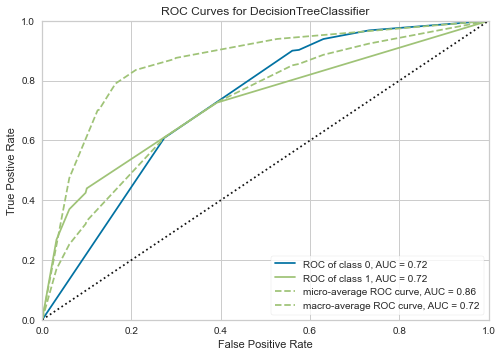

In [12]:
# AUCカーブ
plot_model(estimator=tuned_dt_model, plot = 'auc')

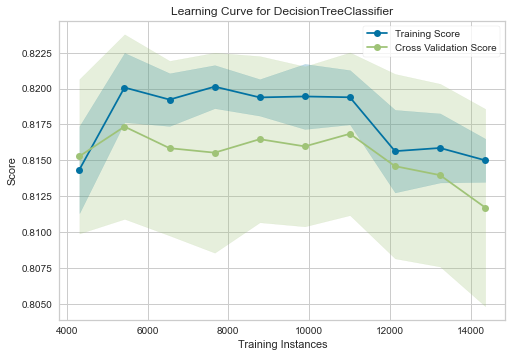

In [13]:
# 学習曲線
plot_model(estimator=tuned_dt_model, plot = 'learning')

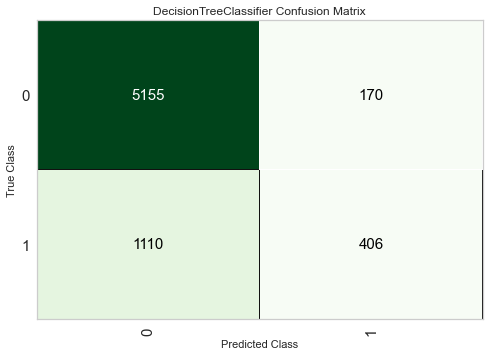

In [14]:
# 混合行列
plot_model(estimator=tuned_dt_model, plot = 'confusion_matrix')

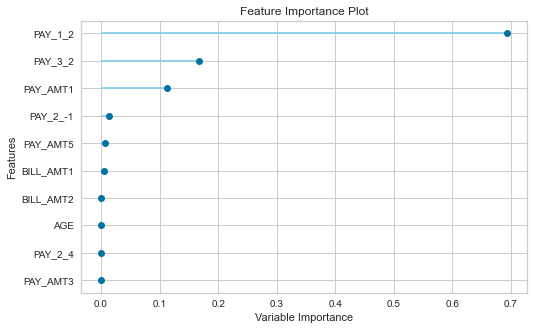

In [15]:
# 重視している特徴量
plot_model(estimator=tuned_dt_model, plot = 'feature')

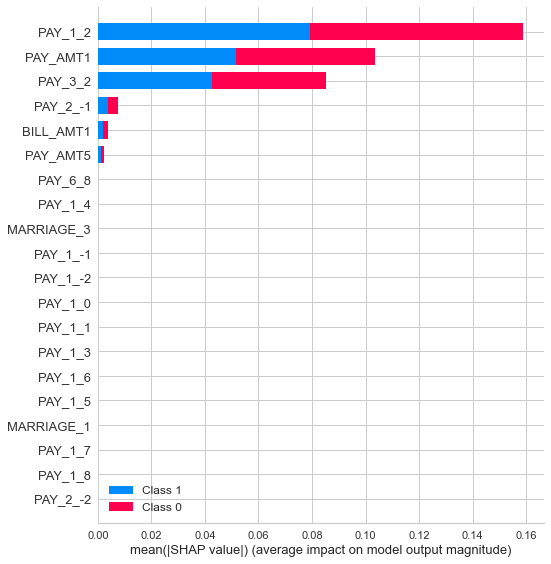

In [16]:
# モデル解釈
interpret_model(estimator=tuned_dt_model)

In [17]:
# 可視化可能なプロット全て(選択式)
# 比較検討に便利
# 参考：Accuracyだけに頼れない理由<https://qiita.com/unohisa/items/00d94f5cfe3f2e5d03b9>
evaluate_model(estimator=tuned_dt_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 推論

In [18]:
predictions = predict_model(tuned_dt_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Decision Tree Classifier,0.8129,0.7244,0.2678,0.7049,0.3881,0.3031


In [19]:
predictions = predict_model(tuned_dt_model, data=test_data)
predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,50000,2,2,1,48,0,0,0,0,0,...,8011.0,2028.0,2453.0,2329.0,431.0,300.0,500.0,0,0,0.1092
1,200000,2,1,1,40,2,2,2,2,2,...,89112.0,4200.0,4100.0,3000.0,3400.0,3500.0,0.0,1,1,0.7148
2,50000,2,3,1,44,1,2,3,2,4,...,15798.0,2100.0,1000.0,2300.0,0.0,0.0,0.0,1,0,0.1092
3,60000,2,2,1,31,2,2,-1,0,0,...,30384.0,1132.0,60994.0,1436.0,1047.0,1056.0,1053.0,1,1,0.7148
4,120000,2,3,2,32,-1,0,0,0,0,...,81354.0,2429.0,3120.0,3300.0,10000.0,3200.0,3200.0,0,0,0.1092


# モデルのファイナライズ
テスト/ホールドアウトサンプルを含む完全なデータセットにモデルを適合させる

In [20]:
final_dt_model = finalize_model(tuned_dt_model)
print(final_dt_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=57, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


# モデルの保存/読み込み

In [21]:
# モデル保存
save_model(final_dt_model, 'FinalizedDecisionTreeClassifierModel')

Transformation Pipeline and Model Succesfully Saved


In [22]:
# モデル読み込み
load_dt_model = load_model('FinalizedDecisionTreeClassifierModel')

Transformation Pipeline and Model Sucessfully Loaded


In [23]:
# ロードしたモデルでの推論
predictions = predict_model(load_dt_model, data=test_data)
predictions.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,50000,2,2,1,48,0,0,0,0,0,...,8011.0,2028.0,2453.0,2329.0,431.0,300.0,500.0,0,0,0.1107
1,200000,2,1,1,40,2,2,2,2,2,...,89112.0,4200.0,4100.0,3000.0,3400.0,3500.0,0.0,1,1,0.6934
2,50000,2,3,1,44,1,2,3,2,4,...,15798.0,2100.0,1000.0,2300.0,0.0,0.0,0.0,1,0,0.3812
3,60000,2,2,1,31,2,2,-1,0,0,...,30384.0,1132.0,60994.0,1436.0,1047.0,1056.0,1053.0,1,0,0.3371
4,120000,2,3,2,32,-1,0,0,0,0,...,81354.0,2429.0,3120.0,3300.0,10000.0,3200.0,3200.0,0,0,0.1107


# アンサンブル学習
ensemble_model()は、pycaret.classification、pycaret.regressionのみで使用可能

### バギング

In [24]:
# 決定木モデル作成
dt_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7024,0.5794,0.3559,0.3378,0.3466,0.1541
1,0.7137,0.6057,0.4124,0.3696,0.3899,0.2035
2,0.7243,0.6045,0.3898,0.3812,0.3855,0.2078
3,0.7274,0.6269,0.4463,0.3980,0.4208,0.2433
4,0.7212,0.6209,0.4407,0.3871,0.4122,0.2304
5,0.7224,0.6177,0.4294,0.3868,0.4070,0.2264
6,0.7093,0.5971,0.3955,0.3590,0.3763,0.1874
7,0.7299,0.6104,0.3955,0.3922,0.3938,0.2201
8,0.7337,0.6260,0.4334,0.4048,0.4186,0.2462
9,0.7254,0.6128,0.4108,0.3867,0.3984,0.2207


In [25]:
# バギング
bagged_dt_model = ensemble_model(dt_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7920,0.6922,0.2994,0.5579,0.3897,0.2778
1,0.8120,0.7350,0.3446,0.6421,0.4485,0.3474
2,0.8039,0.7138,0.3277,0.6073,0.4257,0.3200
3,0.8051,0.7395,0.3701,0.5982,0.4572,0.3464
4,0.8120,0.7532,0.3616,0.6337,0.4604,0.3568
5,0.8070,0.7341,0.3418,0.6173,0.4400,0.3348
6,0.7976,0.7063,0.2938,0.5876,0.3917,0.2862
7,0.8001,0.7250,0.3277,0.5888,0.4211,0.3119
8,0.7957,0.7085,0.3088,0.5707,0.4007,0.2905
9,0.8063,0.7360,0.3371,0.6134,0.4351,0.3299


In [26]:
# バギング ※識別器の数を変更(デフォルトは10)
bagged_dt_model = ensemble_model(dt_model, n_estimators=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7995,0.7146,0.3333,0.5842,0.4245,0.3139
1,0.8127,0.7637,0.3729,0.6316,0.4689,0.3642
2,0.8202,0.7509,0.3701,0.6718,0.4772,0.3795
3,0.8183,0.7689,0.4011,0.6455,0.4948,0.3913
4,0.8164,0.7735,0.3814,0.6459,0.4796,0.3770
5,0.8214,0.7746,0.3814,0.6716,0.4865,0.3882
6,0.8108,0.7392,0.3531,0.6313,0.4529,0.3494
7,0.8208,0.7695,0.3531,0.6868,0.4664,0.3718
8,0.8051,0.7470,0.3399,0.6061,0.4356,0.3289
9,0.8138,0.7507,0.3541,0.6443,0.4570,0.3559


In [27]:
print(bagged_dt_model)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [28]:
# バギング ※ハイパーパラメータチューニング実施
tuned_bagged_dt_model = tune_model('dt', ensemble=True, method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8076,0.7476,0.2881,0.6497,0.3992,0.3044
1,0.8189,0.7778,0.3277,0.6946,0.4453,0.3533
2,0.8252,0.7748,0.3503,0.7168,0.4706,0.3804
3,0.8252,0.7882,0.3475,0.7193,0.4686,0.3788
4,0.8289,0.8036,0.3701,0.7238,0.4897,0.3996
5,0.8302,0.7928,0.3559,0.7456,0.4818,0.3951
6,0.8089,0.7487,0.3023,0.6485,0.4123,0.3158
7,0.8202,0.7745,0.3192,0.7107,0.4405,0.3514
8,0.8114,0.7728,0.2946,0.6667,0.4086,0.3159
9,0.8276,0.7506,0.3569,0.7241,0.4782,0.3889


In [29]:
print(tuned_bagged_dt_model)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=6,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=3,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

### Boosting

In [30]:
# Boosting(Ada Boost)
boosted_dt_model = ensemble_model(dt_model, method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7726,0.6584,0.3305,0.4815,0.3920,0.2580
1,0.7682,0.6745,0.2825,0.4630,0.3509,0.2197
2,0.7726,0.6765,0.2373,0.4746,0.3164,0.1978
3,0.7945,0.7067,0.3277,0.5631,0.4143,0.3001
4,0.7694,0.7065,0.3898,0.4759,0.4286,0.2859
5,0.7632,0.6751,0.3023,0.4496,0.3615,0.2229
6,0.7713,0.6748,0.3475,0.4786,0.4026,0.2656
7,0.7782,0.6782,0.3164,0.5000,0.3875,0.2604
8,0.7744,0.7131,0.2890,0.4834,0.3617,0.2351
9,0.7705,0.6675,0.2606,0.4670,0.3345,0.2092


In [31]:
print(boosted_dt_model)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

### ブレンディング

In [32]:
# ブレンディング(ハード)
# blend_models()は、デフォルトではモデルライブラリのすべてのモデルが使用される
# また、AUCが0になるのは、methodパラメーターがデフォルトでハード指定となっており、
# ラベル（1または0）のみを使用するように設定されているため、AUCが計算されないため
blend_all_hard_model = blend_models()

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8133,0.0,0.3220,0.6628,0.4335,0.3373
1,0.8208,0.0,0.3418,0.6954,0.4583,0.3656
2,0.8214,0.0,0.3446,0.6971,0.4612,0.3686
3,0.8252,0.0,0.3531,0.7143,0.4726,0.3819
4,0.8189,0.0,0.3503,0.6776,0.4618,0.3660
5,0.8321,0.0,0.3672,0.7471,0.4924,0.4055
6,0.8108,0.0,0.3079,0.6566,0.4192,0.3234
7,0.8189,0.0,0.3136,0.7070,0.4344,0.3452
8,0.8145,0.0,0.3229,0.6667,0.4351,0.3398
9,0.8263,0.0,0.3456,0.7262,0.4683,0.3798


In [33]:
# ブレンディング(ソフト)
blend_all_soft_model = blend_models(method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8020,0.7482,0.3531,0.5896,0.4417,0.3304
1,0.8202,0.7730,0.4068,0.6516,0.5009,0.3983
2,0.8202,0.7607,0.4266,0.6426,0.5127,0.4079
3,0.8233,0.7829,0.3729,0.6875,0.4835,0.3881
4,0.8170,0.7811,0.3588,0.6615,0.4652,0.3664
5,0.8271,0.7766,0.4209,0.6773,0.5192,0.4207
6,0.8051,0.7427,0.3983,0.5900,0.4755,0.3614
7,0.8145,0.7749,0.3164,0.6747,0.4308,0.3369
8,0.8114,0.7817,0.3824,0.6193,0.4729,0.3657
9,0.8169,0.7663,0.4193,0.6298,0.5034,0.3967


In [34]:
# ブレンド用モデルを準備
# ※verboseにFalseを指定するとスコアを表示しない
dt_model = create_model('dt', verbose=False)
gbc_model = create_model('gbc', verbose=False)
lgbm_model = create_model('lightgbm', verbose=False)
xgboost_model = create_model('xgboost', verbose=False)

In [35]:
# ブレンディング(モデルを指定、ハード)
blend_4model_hard_model = blend_models(estimator_list=[dt_model, gbc_model, lgbm_model, xgboost_model])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8152,0.0,0.3164,0.6788,0.4316,0.3383
1,0.8208,0.0,0.3446,0.6932,0.4604,0.3672
2,0.8239,0.0,0.3559,0.7039,0.4728,0.3805
3,0.8264,0.0,0.3757,0.7037,0.4899,0.3967
4,0.8214,0.0,0.3588,0.6865,0.4712,0.3763
5,0.8302,0.0,0.3672,0.7345,0.4896,0.4011
6,0.8070,0.0,0.2994,0.6386,0.4077,0.3100
7,0.8170,0.0,0.3192,0.6890,0.4363,0.3442
8,0.8145,0.0,0.3144,0.6727,0.4286,0.3348
9,0.8263,0.0,0.3569,0.7159,0.4764,0.3859


In [36]:
# ブレンディング(モデルを指定、ソフト)
blend_4model_soft_model = blend_models(estimator_list=[dt_model, gbc_model, lgbm_model, xgboost_model], method= 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7970,0.7363,0.3023,0.5815,0.3978,0.2901
1,0.8189,0.7573,0.3644,0.6684,0.4717,0.3736
2,0.8152,0.7596,0.3475,0.6578,0.4547,0.3560
3,0.8158,0.7725,0.3842,0.6415,0.4806,0.3771
4,0.8145,0.7837,0.3785,0.6381,0.4752,0.3713
5,0.8177,0.7744,0.3588,0.6649,0.4661,0.3678
6,0.8064,0.7368,0.3644,0.6056,0.4550,0.3460
7,0.8108,0.7704,0.3249,0.6461,0.4323,0.3334
8,0.8108,0.7661,0.3654,0.6232,0.4607,0.3553
9,0.8157,0.7572,0.3683,0.6468,0.4693,0.3678


### スタッキング

In [37]:
# スタック(ハード)
stack_hard_model = stack_models([dt_model, gbc_model, lgbm_model, xgboost_model], method='hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7782,0.6310,0.0000,0.0,0.0000,0.0000
1,0.7782,0.6554,0.0000,0.0,0.0000,0.0000
2,0.7782,0.6565,0.0000,0.0,0.0000,0.0000
3,0.7782,0.6681,0.0000,0.0,0.0000,0.0000
4,0.7782,0.6411,0.0000,0.0,0.0000,0.0000
5,0.7776,0.6764,0.0000,0.0,0.0000,-0.0013
6,0.7788,0.6351,0.0028,1.0,0.0056,0.0044
7,0.7782,0.6536,0.0000,0.0,0.0000,0.0000
8,0.7788,0.6464,0.0000,0.0,0.0000,0.0000
9,0.7781,0.6535,0.0000,0.0,0.0000,-0.0013


In [38]:
# スタック(ソフト)
stack_soft_model = stack_models([dt_model, gbc_model, lgbm_model, xgboost_model])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7782,0.6343,0.0,0.0,0.0,0.0000
1,0.7782,0.6557,0.0,0.0,0.0,0.0000
2,0.7782,0.6563,0.0,0.0,0.0,0.0000
3,0.7782,0.6664,0.0,0.0,0.0,0.0000
4,0.7782,0.6411,0.0,0.0,0.0,0.0000
5,0.7782,0.6796,0.0,0.0,0.0,0.0000
6,0.7782,0.6351,0.0,0.0,0.0,0.0000
7,0.7782,0.6531,0.0,0.0,0.0,0.0000
8,0.7788,0.6462,0.0,0.0,0.0,0.0000
9,0.7781,0.6549,0.0,0.0,0.0,-0.0013


In [39]:
# スタック(メタモデル(ベースモデルを入力に取るモデル)指定)
stack_soft_model2 = stack_models([dt_model, gbc_model, lgbm_model], meta_model=xgboost_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8089,0.7605,0.3305,0.6324,0.4341,0.3325
1,0.8177,0.7799,0.3446,0.6740,0.4561,0.3600
2,0.8239,0.7748,0.3672,0.6952,0.4806,0.3865
3,0.8246,0.7815,0.3814,0.6888,0.4909,0.3953
4,0.8221,0.8004,0.3757,0.6786,0.4836,0.3867
5,0.8264,0.7883,0.3814,0.6995,0.4936,0.3996
6,0.8095,0.7558,0.3192,0.6420,0.4264,0.3273
7,0.8183,0.7841,0.3446,0.6778,0.4569,0.3614
8,0.8164,0.7778,0.3286,0.6744,0.4419,0.3473
9,0.8263,0.7682,0.3711,0.7043,0.4861,0.3934


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7782,0.6343,0.0,0.0,0.0,0.0000
1,0.7782,0.6557,0.0,0.0,0.0,0.0000
2,0.7782,0.6563,0.0,0.0,0.0,0.0000
3,0.7782,0.6664,0.0,0.0,0.0,0.0000
4,0.7782,0.6411,0.0,0.0,0.0,0.0000
5,0.7782,0.6796,0.0,0.0,0.0,0.0000
6,0.7782,0.6351,0.0,0.0,0.0,0.0000
7,0.7782,0.6531,0.0,0.0,0.0,0.0000
8,0.7788,0.6462,0.0,0.0,0.0,0.0000
9,0.7781,0.6549,0.0,0.0,0.0,-0.0013


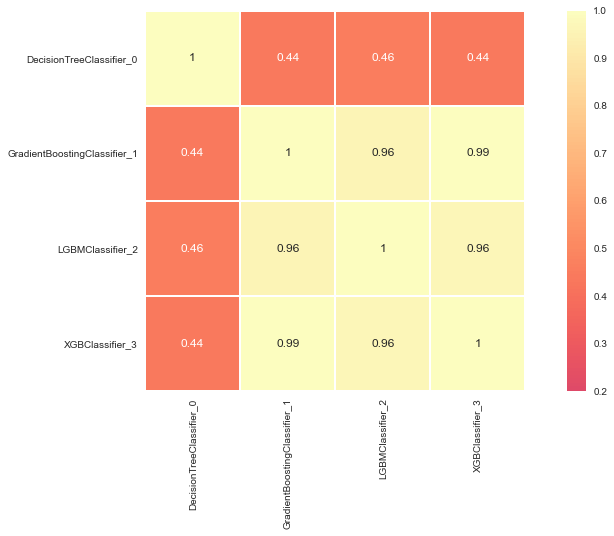

In [40]:
# スタック(プロット有り)
stack_soft_plot_model = stack_models([dt_model, gbc_model, lgbm_model, xgboost_model], plot=True)

# モデルキャリブレーション
calibrate_model()は、pycaret.classificationのみで使用可能

In [41]:
dt_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7024,0.5794,0.3559,0.3378,0.3466,0.1541
1,0.7137,0.6057,0.4124,0.3696,0.3899,0.2035
2,0.7243,0.6045,0.3898,0.3812,0.3855,0.2078
3,0.7274,0.6269,0.4463,0.3980,0.4208,0.2433
4,0.7212,0.6209,0.4407,0.3871,0.4122,0.2304
5,0.7224,0.6177,0.4294,0.3868,0.4070,0.2264
6,0.7093,0.5971,0.3955,0.3590,0.3763,0.1874
7,0.7299,0.6104,0.3955,0.3922,0.3938,0.2201
8,0.7337,0.6260,0.4334,0.4048,0.4186,0.2462
9,0.7254,0.6128,0.4108,0.3867,0.3984,0.2207


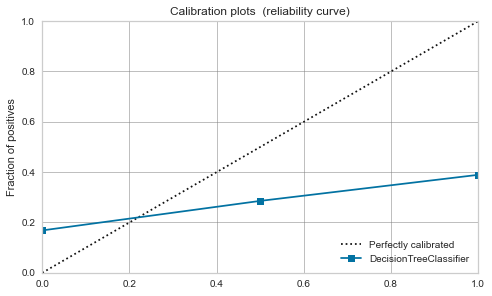

In [42]:
plot_model(dt_model, plot='calibration')

In [43]:
calibrated_dt_model = calibrate_model(dt_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7782,0.6594,0.0,0.0,0.0,0.0
1,0.7782,0.7189,0.0,0.0,0.0,0.0
2,0.7782,0.7007,0.0,0.0,0.0,0.0
3,0.7782,0.7193,0.0,0.0,0.0,0.0
4,0.7782,0.7345,0.0,0.0,0.0,0.0
5,0.7782,0.7318,0.0,0.0,0.0,0.0
6,0.7782,0.6908,0.0,0.0,0.0,0.0
7,0.7782,0.7216,0.0,0.0,0.0,0.0
8,0.7788,0.7248,0.0,0.0,0.0,0.0
9,0.7787,0.7076,0.0,0.0,0.0,0.0


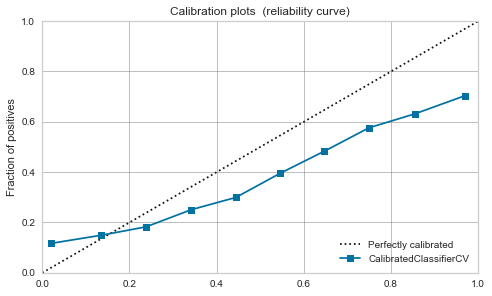

In [44]:
plot_model(calibrated_dt_model, plot='calibration')

In [45]:
calibrated_isotonic_dt_model = calibrate_model(dt_model, method='isotonic')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7782,0.6594,0.0,0.0,0.0,0.0
1,0.7782,0.7188,0.0,0.0,0.0,0.0
2,0.7782,0.7007,0.0,0.0,0.0,0.0
3,0.7782,0.7193,0.0,0.0,0.0,0.0
4,0.7782,0.7345,0.0,0.0,0.0,0.0
5,0.7782,0.7317,0.0,0.0,0.0,0.0
6,0.7782,0.6908,0.0,0.0,0.0,0.0
7,0.7782,0.7215,0.0,0.0,0.0,0.0
8,0.7788,0.7249,0.0,0.0,0.0,0.0
9,0.7787,0.7076,0.0,0.0,0.0,0.0


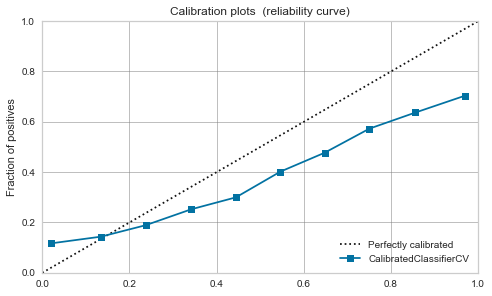

In [46]:
plot_model(calibrated_isotonic_dt_model, plot='calibration')

# 実験全体の保存/読み込み
すべての出力とモデルを含む実験全体を保存可能

In [47]:
# 保存
save_experiment('BinaryClassificationExperiment')

Experiment Succesfully Saved


In [48]:
# 読み込み
experiment = load_experiment('BinaryClassificationExperiment')

,Object
0,Classification Setup Config
1,X_training Set
2,y_training Set
3,X_test Set
4,y_test Set
5,Transformation Pipeline
6,Compare Models Score Grid
7,Decision Tree
8,Decision Tree Score Grid
9,Tuned DecisionTreeClassifier


In [49]:
# 任意の実行結果を取り出し
experiment_loaded_model = experiment[18]  # Tuned BaggingClassifier

In [50]:
predict_model(experiment_loaded_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Bagging Classifier,0.818,0.7693,0.3338,0.6829,0.4484,0.3544


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,30000.0,31.0,29078.0,28312.0,29733.0,29183.0,28082.0,27434.0,0.0,1900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9496
1,180000.0,41.0,139184.0,141752.0,122164.0,111328.0,113890.0,116823.0,6411.0,6000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0791
2,410000.0,41.0,0.0,0.0,0.0,150.0,150.0,1929.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2029
3,150000.0,27.0,133374.0,40283.0,49746.0,51500.0,0.0,0.0,10000.0,10000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0889
4,160000.0,45.0,63198.0,36236.0,37847.0,37837.0,37637.0,0.0,7000.0,2500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,200000.0,45.0,54721.0,52285.0,48615.0,41322.0,0.0,4300.0,2209.0,2109.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0977
6837,200000.0,38.0,8565.0,86497.0,138640.0,75983.0,44160.0,34671.0,85000.0,60000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0716
6838,290000.0,34.0,25530.0,37737.0,29636.0,24104.0,33814.0,32530.0,15035.0,1539.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0875
6839,360000.0,25.0,286732.0,290690.0,284059.0,294308.0,297916.0,279503.0,10792.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5800


In [51]:
predict_model(tuned_bagged_dt_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Bagging Classifier,0.818,0.7693,0.3338,0.6829,0.4484,0.3544


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default,Label,Score
0,30000.0,31.0,29078.0,28312.0,29733.0,29183.0,28082.0,27434.0,0.0,1900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9496
1,180000.0,41.0,139184.0,141752.0,122164.0,111328.0,113890.0,116823.0,6411.0,6000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0791
2,410000.0,41.0,0.0,0.0,0.0,150.0,150.0,1929.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.2029
3,150000.0,27.0,133374.0,40283.0,49746.0,51500.0,0.0,0.0,10000.0,10000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0889
4,160000.0,45.0,63198.0,36236.0,37847.0,37837.0,37637.0,0.0,7000.0,2500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.1047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,200000.0,45.0,54721.0,52285.0,48615.0,41322.0,0.0,4300.0,2209.0,2109.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0977
6837,200000.0,38.0,8565.0,86497.0,138640.0,75983.0,44160.0,34671.0,85000.0,60000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0716
6838,290000.0,34.0,25530.0,37737.0,29636.0,24104.0,33814.0,32530.0,15035.0,1539.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0875
6839,360000.0,25.0,286732.0,290690.0,284059.0,294308.0,297916.0,279503.0,10792.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5800
